# TensorFlow

## Imports

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

## MNIST Dataset

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!pip install python-mnist
#!pip install Pillow

In [7]:
from mnist import MNIST
from PIL import Image
mndata = MNIST('C:\\Users\\Gustavo\\Py Projects\\classificacao\\knn\\mnist_data')
mndata.gz = True
images, labels_mndata = mndata.load_training()

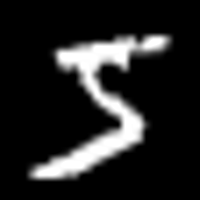

In [8]:
img = Image.fromarray(np.array(images[0]).reshape(28,28).astype('uint8'), 'L')
img.resize((200,200))

### Create Train and Test Sets

In [43]:
IMG_SIZE = 28
x = np.array(images).reshape(-1,IMG_SIZE,IMG_SIZE,1).astype(float)/255.0

In [44]:
y = np.array(labels_mndata)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Create Model

#### Convolutional Layers

In [58]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 1, 1, 64)          73792     
Total params: 166,464
Trainable params: 166,464
Non-trainable params: 0
________________________________________________

#### Classification Layer

In [60]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [61]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 1, 1, 64)          73792     
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

#### Define Loss Funcion

In [62]:
# defining the loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Train Model

In [63]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2059 - accuracy: 0.9357 - val_loss: 0.0619 - val_accuracy: 0.9823
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.0583 - val_accuracy: 0.9830
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0382 - val_accuracy: 0.9886
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0334 - accuracy: 0.9899 - val_loss: 0.0445 - val_accuracy: 0.9866
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0602 - val_accuracy: 0.9853
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0522 - val_accuracy: 0.9877
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0409 - val_accuracy:

### Evaluate Model

469/469 - 1s - loss: 0.0550 - accuracy: 0.9884


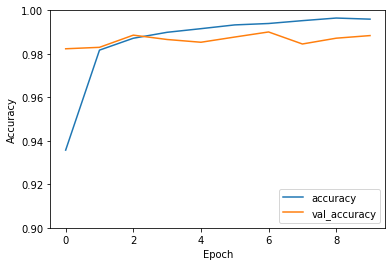

In [64]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [65]:
y_prob = model(X_test)
y_hat = np.argmax(y_prob, axis=1) 

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1495
           1       0.99      1.00      0.99      1649
           2       0.98      0.99      0.98      1471
           3       1.00      0.97      0.99      1518
           4       0.98      1.00      0.99      1443
           5       0.98      0.99      0.98      1383
           6       0.99      1.00      1.00      1482
           7       0.98      0.99      0.99      1635
           8       0.99      0.98      0.98      1445
           9       0.99      0.98      0.98      1479

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [67]:
i = 10
y_pred = model(X_test[i,:,:,:].reshape(-1,28,28,1))

In [68]:
y_pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 0.08008557, -3.7185307 , 10.630471  , -6.5557933 , -4.682983  ,
        -2.6542068 , -3.4902582 , -5.5401554 , -6.577204  , -7.5894456 ]],
      dtype=float32)>

Predicted Digit = 2
Expected Digit = 2


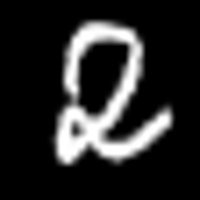

In [69]:
print("Predicted Digit =", np.argmax(y_pred))
print("Expected Digit =", y_test[i])
X_print = X_test*255
img = Image.fromarray(X_print[i,:,:].reshape(IMG_SIZE, IMG_SIZE).astype('uint8'), 'L')
img.resize((200,200))

In [70]:
exit()